In [44]:
# 코드 돌릴 때 변경할 사항
# log_file_path
# point loss 관련 주석
# weak 계수
# axvline 수치 (best iteration)

In [1]:
import matplotlib.pyplot as plt

In [123]:
log_file_path = "/home/user/weak-da-seg-new/weak-da-seg/snapshot/25.gaps_s-rissbilder_t-weakpoint-adam/log.txt"
lambda_weak = 0.2  # 0.01 for pseudo, 0.2 for oracle
lambda_d = 0.001
lambda_o = 0.001
best_iter = 21000

In [124]:
seg2_values = []
adv2_values = []
wadv2_values = []
weak_values = []
pl_values = []

d2_values = []
wD2_values = []

In [125]:
# loss 변수명에 따라 split 기준 변경

with open(log_file_path, 'r') as file:
    for line in file:
        if 'iter' in line and 'weak' in line:
            seg2 = float(line.split('seg2 = ')[-1].split()[0].strip())
            adv2 = lambda_o*float(line.split(', adv2 = ')[-1].split(',')[0].strip())
            d2 = float(line.split(' D2 = ')[-1].split(',')[0].strip())
            weak = lambda_weak*float(line.split(', weak = ')[-1].split(',')[0].strip())
            wadv2 = lambda_d*float(line.split('wadv2 = ')[-1].split(',')[0].strip())
            wD2 = float(line.split('wD2 = ')[-1].split(',')[0].strip())
            pl = float(line.split('pl = ')[-1].split(',')[0].strip())

            seg2_values.append(seg2)
            adv2_values.append(adv2)
            wadv2_values.append(wadv2)
            weak_values.append(weak)
            pl_values.append(pl)
            d2_values.append(d2)
            wD2_values.append(wD2)

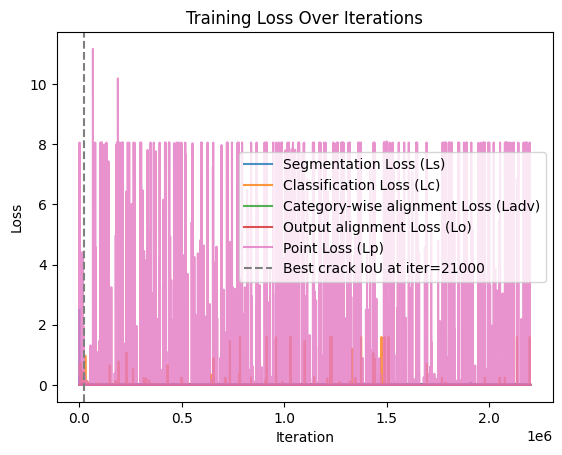

In [126]:
# 그래프 그리기 G - every loss
iterations = range(0, len(seg2_values) * 100, 100)  # 100은 각 반복(iteration)의 간격

plt.plot(iterations, seg2_values, label='Segmentation Loss (Ls)', alpha=0.8)
plt.plot(iterations, weak_values, label='Classification Loss (Lc)', alpha=0.8)
plt.plot(iterations, wadv2_values, label='Category-wise alignment Loss (Ladv)', alpha=0.8)
plt.plot(iterations, adv2_values, label='Output alignment Loss (Lo)', alpha=0.8)
plt.plot(iterations, pl_values, label='Point Loss (Lp)', alpha=0.8, color='C6')

plt.axvline(x=best_iter, color='C7', linestyle='--', label=f'Best crack IoU at iter={best_iter}')

plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

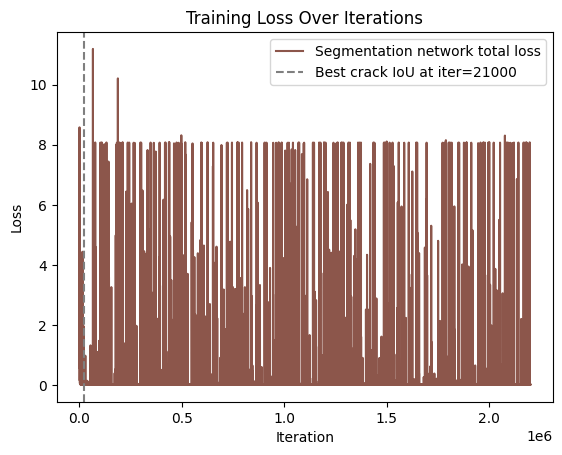

In [127]:
# 그래프 그리기 G - sum loss
iterations = range(0, len(seg2_values) * 100, 100)  # 100은 각 반복(iteration)의 간격

total_values = [seg2_value + weak_value + wadv2_value + adv2_value for seg2_value, weak_value, wadv2_value, adv2_value in zip(seg2_values, weak_values, wadv2_values, adv2_values)]
total_values = [total_value + pl_value for total_value, pl_value in zip(total_values, pl_values)]

plt.plot(iterations, total_values, label='Segmentation network total loss', color='C5')

plt.axvline(x=best_iter, color='C7', linestyle='--', label=f'Best crack IoU at iter={best_iter}')

plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

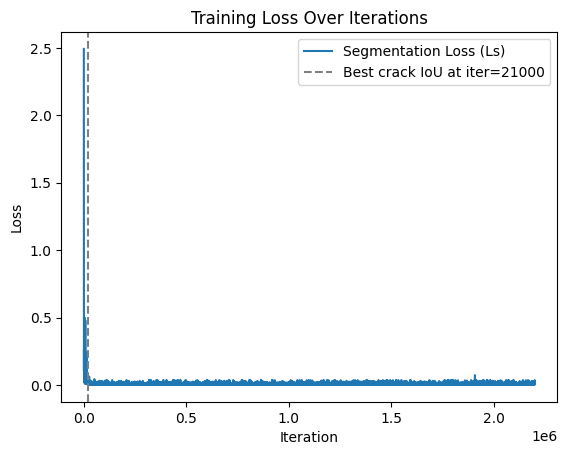

In [128]:
# 그래프 그리기 G - segmentation loss
iterations = range(0, len(seg2_values) * 100, 100)  # 100은 각 반복(iteration)의 간격

plt.plot(iterations, seg2_values, label='Segmentation Loss (Ls)')

plt.axvline(x=best_iter, color='C7', linestyle='--', label=f'Best crack IoU at iter={best_iter}')

plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

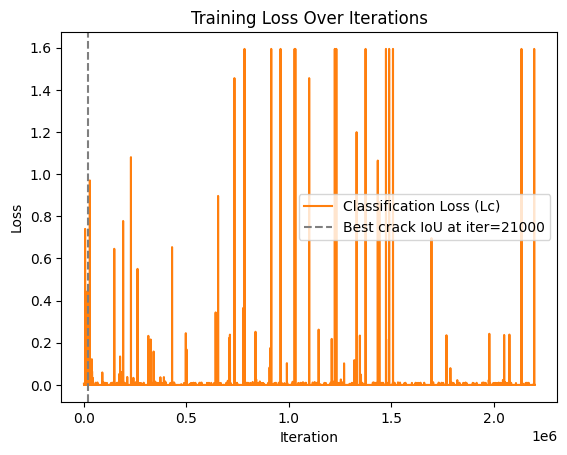

In [129]:
# 그래프 그리기 G - classification loss
iterations = range(0, len(seg2_values) * 100, 100)  # 100은 각 반복(iteration)의 간격

plt.plot(iterations, weak_values, label='Classification Loss (Lc)', color='C1')

plt.axvline(x=best_iter, color='C7', linestyle='--', label=f'Best crack IoU at iter={best_iter}')

plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

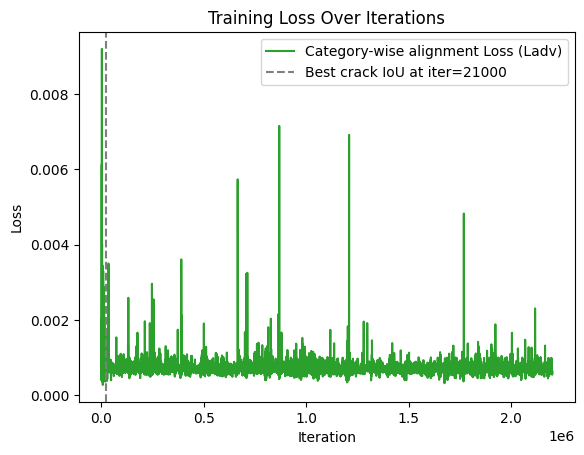

In [130]:
# 그래프 그리기 G - category-wise alignment loss
iterations = range(0, len(seg2_values) * 100, 100)  # 100은 각 반복(iteration)의 간격

plt.plot(iterations, wadv2_values, label='Category-wise alignment Loss (Ladv)', color='C2')

plt.axvline(x=best_iter, color='C7', linestyle='--', label=f'Best crack IoU at iter={best_iter}')

plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

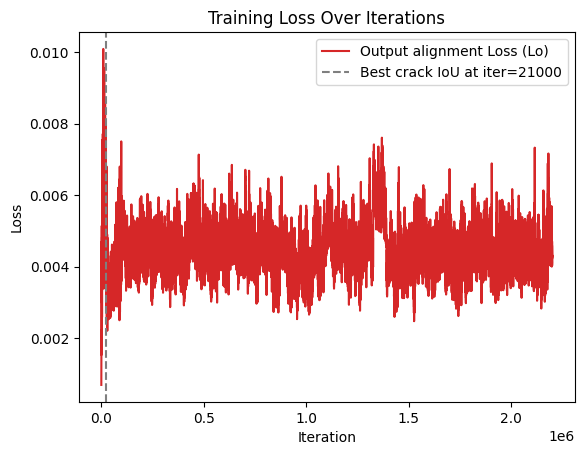

In [131]:
# 그래프 그리기 G - output alignment loss
iterations = range(0, len(seg2_values) * 100, 100)  # 100은 각 반복(iteration)의 간격

plt.plot(iterations, adv2_values, label='Output alignment Loss (Lo)', color='C3')

plt.axvline(x=best_iter, color='C7', linestyle='--', label=f'Best crack IoU at iter={best_iter}')

plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

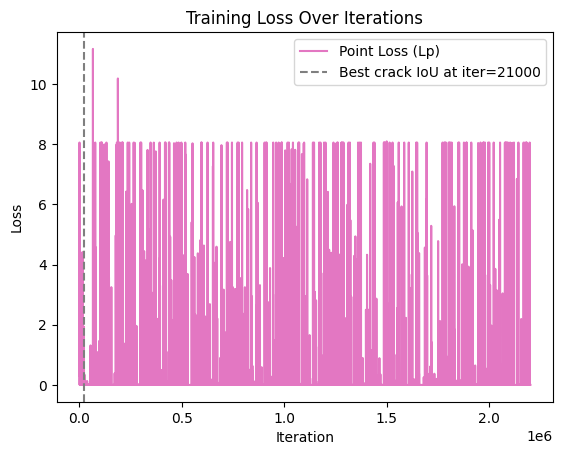

In [132]:
# 그래프 그리기 G - point loss
iterations = range(0, len(seg2_values) * 100, 100)  # 100은 각 반복(iteration)의 간격

plt.plot(iterations, pl_values, label='Point Loss (Lp)', color='C6')

plt.axvline(x=best_iter, color='C7', linestyle='--', label=f'Best crack IoU at iter={best_iter}')

plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

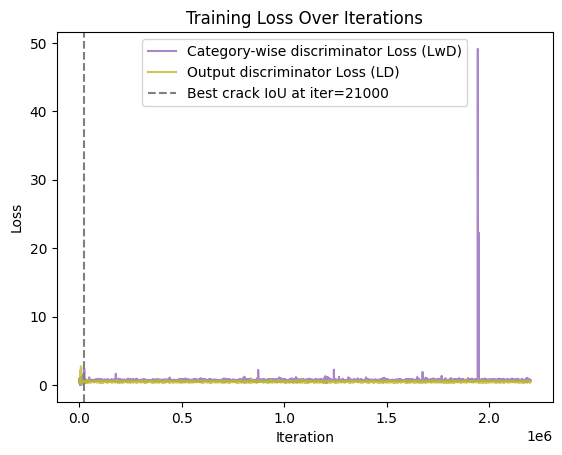

In [133]:
# 그래프 그리기 D - every loss
iterations = range(0, len(seg2_values) * 100, 100)  # 100은 각 반복(iteration)의 간격

plt.plot(iterations, wD2_values, label='Category-wise discriminator Loss (LwD)', color='C4', alpha=0.8)
plt.plot(iterations, d2_values, label='Output discriminator Loss (LD)', color='C8', alpha=0.8)

plt.axvline(x=best_iter, color='C7', linestyle='--', label=f'Best crack IoU at iter={best_iter}')

plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

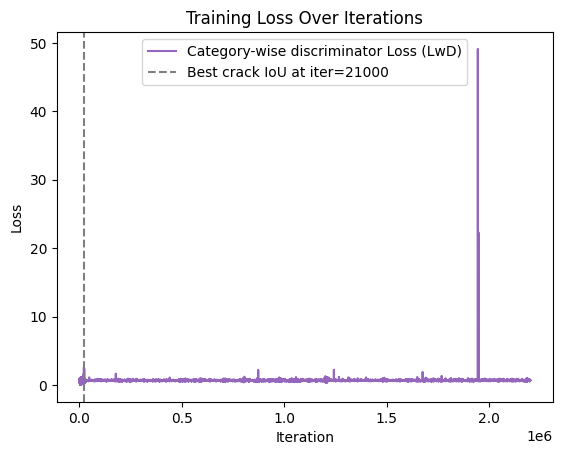

In [134]:
# 그래프 그리기 D - category-wise discriminator loss
iterations = range(0, len(seg2_values) * 100, 100)  # 100은 각 반복(iteration)의 간격

plt.plot(iterations, wD2_values, label='Category-wise discriminator Loss (LwD)', color='C4')

plt.axvline(x=best_iter, color='C7', linestyle='--', label=f'Best crack IoU at iter={best_iter}')

plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

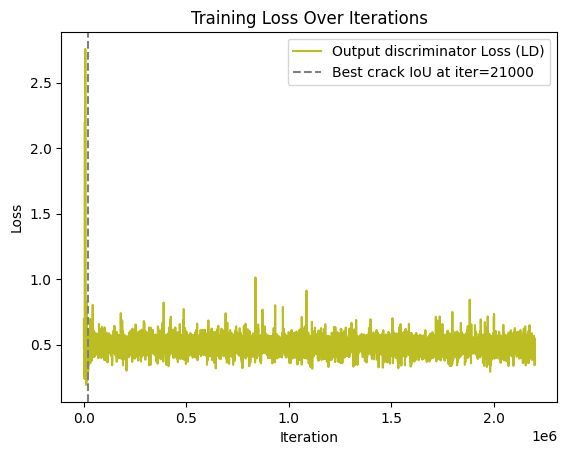

In [135]:
# 그래프 그리기 D - output discriminator loss
iterations = range(0, len(seg2_values) * 100, 100)  # 100은 각 반복(iteration)의 간격

plt.plot(iterations, d2_values, label='Output discriminator Loss (LD)', color='C8')

plt.axvline(x=best_iter, color='C7', linestyle='--', label=f'Best crack IoU at iter={best_iter}')

plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()